In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from plotnine import *
import pandas as pd
import random

In [98]:
# Seeding for reproducable results
random.seed(3922020)

## Single Linear Regression

In [99]:
data = pd.read_csv("~/Desktop/ChapmanSpring20/CPSC392/Assignments/03-boston/boston.csv")
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [100]:
data.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


### Finding Correlation
- From the correlation matrix we see that median value is most negatively correlated with lstat, we'll predict median value using lstat
- note that chas is showing up as a numerical variable while it should be factor (0,1), we will not consider this variable as it is best suited for logistic regression
- First we need to do a 70/30 split on the data to get our train and test sets

In [101]:
train, test = train_test_split(data, test_size=0.3)
train = train.reset_index()
test = test.reset_index()

### Linear model on the train set
- now that we've split the data we can run a linear model, generate predictions, and plot on the train set

In [102]:
lm = LinearRegression()
observed_x = train['lstat'].values.reshape(-1,1)
observed_y = train['medv'].values.reshape(-1,1)
lm.fit(observed_x,observed_y)

train['preds'] = lm.predict(observed_x)
train.head()

,index,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds
0,304,466,3.16360,0.0,18.10,0,0.6550,5.759,48.2,3.0665,24,666,20.2,334.40,14.13,19.9,21.114705
1,234,357,8.98296,0.0,18.10,1,0.7700,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,17.727825
2,44,67,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4,24.911524
3,182,272,0.16211,20.0,6.96,0,0.4640,6.240,16.3,4.4290,3,223,18.6,396.90,6.59,25.2,28.474093
4,141,204,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5,31.187501


In [103]:
print("The equation of the line is:")
print("y = ",lm.intercept_[0],"+",lm.coef_[0][0],"x")

The equation of the line is:
y =  34.906236648731394 + -0.9760461095954743 x


In [104]:
predicted_y = lm.predict(observed_x)
r2_score(observed_y,predicted_y)

0.5871519701891159

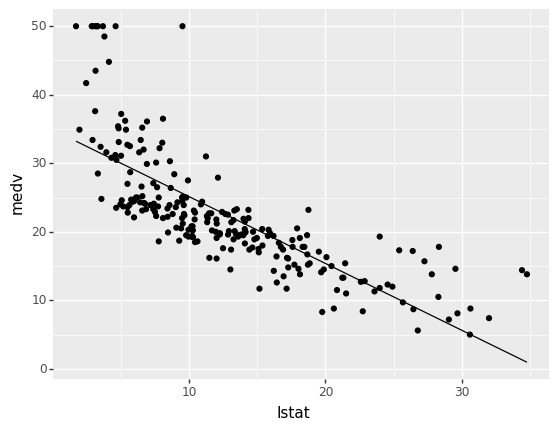

<ggplot: (7550976165)>

In [105]:
ggplot(train, aes(x = 'lstat', y = 'medv')) + geom_point() + geom_line(aes(y = 'preds'))

- The r^2 value of out model was 0.5872, which means that it explaines 58.72% of the variation in our training set, which is not very accurate. From the plot, we see that there might be a few outliers so it might be good to look into those eventually

### Linear model on the test set
- we've trained our model using the training set so now we can test performance on the test set

In [106]:
observed_x_test = test['lstat'].values.reshape(-1,1)
observed_y_test = test['medv'].values.reshape(-1,1)
test['preds'] = lm.predict(observed_x_test)
test.head()

,index,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds
0,82,122,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3,20.978059
1,147,214,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1,25.750924
2,114,168,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,23.8,23.057037
3,130,187,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0,30.562831
4,316,481,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,23.0,24.423501


In [107]:
predicted_y_test = lm.predict(observed_x_test)
r2_score(observed_y_test,predicted_y_test)

0.45924830600734623

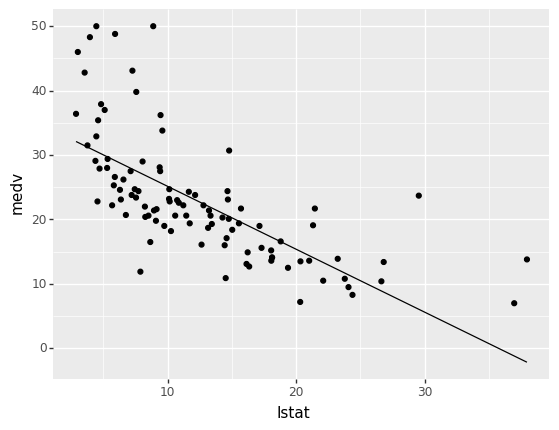

<ggplot: (7550871993)>

In [108]:
ggplot(test, aes(x = 'lstat', y = 'medv')) + geom_point() + geom_line(aes(y = 'preds'))

## Multiple Linear Regression

- As expected we get a lower r^2 value in our test set where our model only explaines 46% of the variation
- The accuracy of the model is pretty low, we'll see how well the model improves if we introduce another independent variable to our model
- We already have our data so we'll look at the correlation matrix again to select a variable then resplit the data 70/30

In [109]:
data_m = pd.read_csv("~/Desktop/ChapmanSpring20/CPSC392/Assignments/03-boston/boston.csv")
data_m.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


- rm shows a fair positive relationship with medv and is not strongly ( >.80 || <-.80) correlated with lstat, so we will use that attribute next

In [110]:
train_m, test_m = train_test_split(data_m, test_size=0.3)
train_m = train.reset_index()
test_m = test.reset_index()

In [111]:
lm_m = LinearRegression()
lm_m.fit(train_m[['lstat','rm']],train_m['medv'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
print("The equation of the line is:")
print("y = ",lm_m.intercept_[0],"+",lm_m.coef_[0][0],"x1" + " +",lm_m.coef_[0][1],"x2")
predicted_y_m = lm_m.predict(train_m[['lstat','rm']])
print("r2 value : " + str(r2_score(train_m['medv'],predicted_y_m)))

The equation of the line is:
y =  1.7656864464095463 + -0.6879539147529371 x1 + 4.712395555202184 x2
r2 value : 0.6675211934608258


In [113]:
train_m['preds'] = lm_m.predict(train_m[['lstat','rm']])
train_m.head()

,level_0,index,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds
0,0,304,466,3.16360,0.0,18.10,0,0.6550,5.759,48.2,3.0665,24,666,20.2,334.40,14.13,19.9,19.183584
1,1,234,357,8.98296,0.0,18.10,1,0.7700,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,18.931099
2,2,44,67,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4,21.991671
3,3,182,272,0.16211,20.0,6.96,0,0.4640,6.240,16.3,4.4290,3,223,18.6,396.90,6.59,25.2,26.637418
4,4,141,204,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5,36.151024


- Our r2 value is higher when we use two variables, we are able to explain about 10% more of the variation but the accuracy is still not very good (r2 !>= .8)
- Now we'll generate predictions and calculate r2 using the test set

In [114]:
test_m['preds'] = lm_m.predict(test_m[['lstat','rm']])
test_m.head()

,level_0,index,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds
0,0,82,122,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3,20.241807
1,1,147,214,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1,25.354200
2,2,114,168,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,23.8,21.108675
3,3,130,187,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0,35.607061
4,4,316,481,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,23.0,23.791834


In [115]:
predicted_y_testm = lm_m.predict(test_m[['lstat','rm']])
r2_score(test_m['medv'],predicted_y_testm)

0.5647465913265425

- Again we see a lower score than our train set which is expected, however introducing another variable still increased our r2 value in the test set